In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_raw = pd.read_csv('https://drive.google.com/uc?export=download&id=1aEoPKbRhbMPdlRLHBtxRtwy7drOIbwZB', encoding='latin-1')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
df_raw

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [4]:
#Mengganti nilai NaN/Null pada kolom quantitatif dengan nilai rata-rata
#inplace = true, berarti ikut mengganti juga di dataframe

df_raw['normalized-losses'].replace(np.nan, df_raw['normalized-losses'].mean(), inplace=True)
df_raw['bore'].replace(np.nan, df_raw['bore'].mean(), inplace=True)
df_raw['stroke'].replace(np.nan, df_raw['stroke'].mean(), inplace=True)
df_raw['horsepower'].replace(np.nan, df_raw['horsepower'].mean(), inplace=True)
df_raw['peak-rpm'].replace(np.nan, df_raw['peak-rpm'].mean(), inplace=True)
df_raw['price'].replace(np.nan, df_raw['price'].mean(), inplace=True)

df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#menampilkan data null (terutama kualitatif data)
df_raw[df_raw.isna().any(axis=1)] #axis = 1 berdasarkan kolom

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [6]:
#menghapus 2 baris sisa yang memiliki data null, karena data kualitatif jadi tidak bisa diganti dengan nilai rata-rata
df = df_raw.dropna(axis=0) #axis = 0, berarti baris yang mengandung null dihapus. Sedangkan axis = 1, berarti kolom yang mengandung null dihapus
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non-null

In [7]:
#normalisasi data, dengan mengganti city mpg(mile per gallon) menjadi Liter per 100km

df['city-mpg'] = 235/df['city-mpg']
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


In [8]:
#normalisasi selanjutnya, agar lenght, width, height memiliki range yang sama

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,10.217391,8.392857,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,12.368421,9.400000,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,13.055556,10.217391,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,9.038462,8.703704,22470.0


In [9]:
#DATA BINNING: Yaitu mengelompokkan data ke dalam suatu kategori, dalam hal ini adalah price
#Price akan dikelompokkan ke dalam 3 kategori, low, middle, dan high
grup = ['Low', 'Medium', 'High'] #nama grup
bins = np.linspace(min(df['price']), max(df['price']), 4) #untuk menentukan batas garis pembagi... |xxx|xxx|xxx|, untuk membuat 3 kategori berarti ada 4 slice
df['price-bin'] = pd.cut(df['price'], bins, labels= grup, include_lowest= True) #membuat kolom baru berisi kolom price yang dicut

In [10]:
gruphp = ['Low', 'Medium', 'High']
hpbins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4) #untuk menentukan batas garis pembagi... |xxx|xxx|xxx|, untuk membuat 3 kategori berarti ada 4 slice
df['hp-bin'] = pd.cut(df['horsepower'], hpbins, labels= gruphp, include_lowest= True) #membuat kolom baru berisi kolom price yang dicut

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,price-bin,hp-bin
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Low,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,10.217391,8.392857,16845.0,Low,Low
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,12.368421,9.400000,19045.0,Medium,Medium
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,13.055556,10.217391,21485.0,Medium,Medium
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,9.038462,8.703704,22470.0,Medium,Low


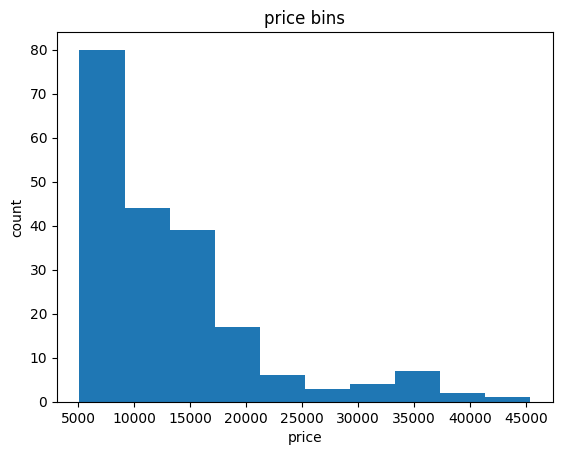

In [11]:
plt.hist(df["price"])

# set x/y labels and plot title
plt.xlabel("price")
plt.ylabel("count")
plt.title("price bins")
plt.show()

In [12]:
#Mengubah kategori variabel ke dalam kuantitatif variabel
#membuat dummy variabel
fuel_dummy = pd.get_dummies(df['fuel-type'])
fuel_dummy.rename(columns={'diesel': 'type-diesel', 'gas': 'type-gas'}, inplace=True)
fuel_dummy


,type-diesel,type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In [13]:
#Mengubah kategori variabel ke dalam kuantitatif variabel
#membuat dummy variabel
asp_dummy = pd.get_dummies(df['aspiration'])
asp_dummy.rename(columns={'std': 'type-std', 'turbo': 'type-turbo'}, inplace=True)
asp_dummy


,type-std,type-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
200,True,False
201,False,True
202,True,False
203,False,True


In [14]:
#mengggabungkan dataframe utama, fuel dummy, dan aspiration dummy
#lalu menghapus kolom fuel type dan aspiration (gunakan axis 1)

df_new = pd.concat([df, fuel_dummy, asp_dummy], axis=1)
df_new.drop('fuel-type', axis=1, inplace=True)
df_new.drop('aspiration', axis=1, inplace=True)
df_new.rename(columns={'type-std':'aspiration-std', 'type-turbo': 'aspiration-turbo'}, inplace=True)
df_new

#argument inplace ternyata cukup berbahaya sehingga kodenya langsung dikunci

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-L/100km,highway-L/100km,price,price-bin,hp-bin,type-diesel,type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,11.190476,8.703704,13495.0,Low,Low,False,True,True,False
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,11.190476,8.703704,16500.0,Low,Low,False,True,True,False
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,12.368421,9.038462,16500.0,Low,Medium,False,True,True,False
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,9.791667,7.833333,13950.0,Low,Low,False,True,True,False
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,13.055556,10.681818,17450.0,Low,Low,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,5400.0,10.217391,8.392857,16845.0,Low,Low,False,True,True,False
201,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.951591,...,5300.0,12.368421,9.400000,19045.0,Medium,Medium,False,True,False,True
202,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,5500.0,13.055556,10.217391,21485.0,Medium,Medium,False,True,True,False
203,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,4800.0,9.038462,8.703704,22470.0,Medium,Low,True,False,False,True


In [15]:
df_new.to_csv('automobile_clean.csv')

In [16]:
df_new.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-L/100km,highway-L/100km,price,price-bin,hp-bin,type-diesel,type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,11.190476,8.703704,13495.0,Low,Low,False,True,True,False
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,11.190476,8.703704,16500.0,Low,Low,False,True,True,False
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,12.368421,9.038462,16500.0,Low,Medium,False,True,True,False
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,9.791667,7.833333,13950.0,Low,Low,False,True,True,False
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,13.055556,10.681818,17450.0,Low,Low,False,True,True,False
